#NBD PROJECT


**Francesco Pezone** 1913202\
**Alessio Sampieri** 1765522\
**Lucia Testa** 1764018

# Connect to GDrive and import


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
try:
  import pyshark
except:
  !pip install pyshark
  import pyshark

!apt-get install -y tshark
!apt-get install tcpdump
!apt-get install tcpflow
!apt-get install gzip
import pickle
import os
from collections import Counter
import time
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# function to identify the upper value for the outliers
def Find_out(data):
  dataset = sorted(data)
  q1, q3= np.percentile(dataset,[25,75])
  iqr = q3 - q1
  upper_bound = q3 +(1.5 * iqr) 
  return (upper_bound)


# PCAP file

## Download and unzip

In [ ]:
# move into the directory
os.chdir('/content/drive/My Drive/NBDLab/data/Pcap_originale')

In [ ]:
# download
!wget http://mawi.nezu.wide.ad.jp/mawi/samplepoint-G/2020/202004221400.pcap.gz

In [ ]:
# unzip
! gzip -d data/202004221400.pcap.gz

## Split in smaller chunks

In [ ]:
os.chdir('/content/drive/My Drive/NBDLab/data')

In [ ]:
# split it in 30 second chunks
! editcap -F pcap -i 30 Pcap_originale/202004221400.pcap split/traffic_traces-30s.pcap

## Save only usefull informations

We are going to create, for each of the first four 30 seconds traces, 5 differents .csv files.

### TCP and IPv4
We are going to save the 5 infos usefull to determine a flow plus the frame length, the relative time (wrt the firs packet) and the window size

### TCP and IPv6
Like for the other TCP

### UDP and IPv4
We are going to save the 5 infos usefull to determine a flow plus the frame length, the relative time (wrt the firs packet)

### UDP and IPv6
Like for the other UDP

### Neither TCP nor UDP
the relative time (wrt the firs packet), the type of protocol, both the IP and the frame length


In [ ]:
os.chdir('/content/drive/My Drive/NBDLab/data/split')

In [ ]:
# file 0
s = time.time()
!tshark -r traffic_traces_30s_00000_20200422051000.pcap -Y '(tcp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/0_tcp_ipv4.csv
!tshark -r traffic_traces_30s_00000_20200422051000.pcap -Y '(tcp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ipv6.src -e ipv6.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/0_tcp_ipv6.csv
!tshark -r traffic_traces_30s_00000_20200422051000.pcap -Y '(udp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/0_udp_ipv4.csv
!tshark -r traffic_traces_30s_00000_20200422051000.pcap -Y '(udp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/0_udp_ipv6.csv
!tshark -r traffic_traces_30s_00000_20200422051000.pcap -Y '!(tcp)&&!(udp)' -T fields -e frame.time_relative -e _ws.col.Protocol -e ip.src -e ip.dst -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/0_others.csv

print('file 0 in ',(time.time()- s)//60)
# file 1
!tshark -r traffic_traces_30s_00001_20200422051030.pcap -Y '(tcp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/1_tcp_ipv4.csv
!tshark -r traffic_traces_30s_00001_20200422051030.pcap -Y '(tcp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ipv6.src -e ipv6.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/1_tcp_ipv6.csv
!tshark -r traffic_traces_30s_00001_20200422051030.pcap -Y '(udp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/1_udp_ipv4.csv
!tshark -r traffic_traces_30s_00001_20200422051030.pcap -Y '(udp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/1_udp_ipv6.csv
!tshark -r traffic_traces_30s_00001_20200422051030.pcap -Y '!(tcp)&&!(udp)' -T fields -e frame.time_relative -e _ws.col.Protocol -e ip.src -e ip.dst -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/1_others.csv

print('file 1 in ',(time.time()- s)//60)
# file 2
!tshark -r traffic_traces_30s_00002_20200422051100.pcap -Y '(tcp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/2_tcp_ipv4.csv
!tshark -r traffic_traces_30s_00002_20200422051100.pcap -Y '(tcp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ipv6.src -e ipv6.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/2_tcp_ipv6.csv
!tshark -r traffic_traces_30s_00002_20200422051100.pcap -Y '(udp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/2_udp_ipv4.csv
!tshark -r traffic_traces_30s_00002_20200422051100.pcap -Y '(udp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/2_udp_ipv6.csv
!tshark -r traffic_traces_30s_00002_20200422051100.pcap -Y '!(tcp)&&!(udp)' -T fields -e frame.time_relative -e _ws.col.Protocol -e ip.src -e ip.dst -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/2_others.csv

print('file 2 in ',(time.time()- s)//60)
# file 3
!tshark -r traffic_traces_30s_00003_20200422051130.pcap -Y '(tcp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/3_tcp_ipv4.csv
!tshark -r traffic_traces_30s_00003_20200422051130.pcap -Y '(tcp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ipv6.src -e ipv6.dst -e tcp.srcport -e tcp.dstport -e frame.len -e tcp.window_size -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/3_tcp_ipv6.csv
!tshark -r traffic_traces_30s_00003_20200422051130.pcap -Y '(udp)&&(ip.version == 4)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/3_udp_ipv4.csv
!tshark -r traffic_traces_30s_00003_20200422051130.pcap -Y '(udp)&&(ip.version == 6)' -T fields -e frame.time_relative -e ip.proto -e ip.src -e ip.dst -e udp.srcport -e udp.dstport -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/3_udp_ipv6.csv
!tshark -r traffic_traces_30s_00003_20200422051130.pcap -Y '!(tcp)&&!(udp)' -T fields -e frame.time_relative -e _ws.col.Protocol -e ip.src -e ip.dst -e frame.len -E quote=d -E header=y -E separator=, -E occurrence=f > csv_finali/3_others.csv

print('file 3 in ',(time.time()- s)//60)

# Part 1) 

### Read TCP and UDP .csv


In [3]:
# a list to store both TCP and UDP packete dataframe
DF = []
DF_single_type = []

start = time.time()
# choose TCP or UDP
for s in ['tcp', 'udp']:
  
  # Choose de IP version
  for m in [4, 6]:
    
    
    # choose the number of chunks to analyze
    for j in range(4):
      print(s,m,j,time.time()-start)
      
      # read the .csv
      df = pd.read_csv('/content/drive/My Drive/NBDLab/data/split/csv_finali/'+str(j)+'_'+s+'_ipv'+str(m)+'.csv')
    
      # add the right amount of seconds
      df['frame.time_relative'] = df['frame.time_relative'] + 30*j
    
      # since <m> is the ip we can drop this column
      df = df.drop(columns = ['ip.proto'])
      df['ip.proto'] = [s]*len(df)
      df['ip_ver'] = [m]*len(df)
    
      # renamining the column of IPv6
      if m == 6:
        df.rename(columns={'ipv6.src':'ip.src', 'ipv6.dst':'ip.dst'}, inplace=True)
      print('letto')
      DF_single_type.append(df)
  print(time.time()-start)
  # concatenate all the dataframes
  DF.append(pd.concat(DF_single_type))

  # free up memory space
  DF_single_type = []
print(time.time()-start)

tcp 4 0 0.00016641616821289062
letto
tcp 4 1 25.038366317749023
letto
tcp 4 2 44.192065715789795
letto
tcp 4 3 66.98282814025879
letto
tcp 6 0 88.2158875465393
letto
tcp 6 1 91.8045482635498
letto
tcp 6 2 97.2426061630249
letto
tcp 6 3 101.0349440574646
letto
104.70706725120544
udp 4 0 116.52885460853577
letto
udp 4 1 119.14893054962158
letto
udp 4 2 122.00500130653381
letto
udp 4 3 124.86568832397461
letto
udp 6 0 127.8864107131958
letto
udp 6 1 128.28403568267822
letto
udp 6 2 128.88301920890808
letto
udp 6 3 129.40862345695496
letto
129.90172910690308
130.93988633155823


### From packets to flows

In [4]:
# new list of dataframes
DF_flows = []


t_u = ['TCP', 'UDP']

# how characterize a flow
Flows_char = {'TCP' : ['ip.src', 'ip.dst', 'ip.proto', 'tcp.srcport',	'tcp.dstport'],
              'UDP' : ['ip.src', 'ip.dst', 'ip.proto', 'udp.srcport',	'udp.dstport']}
# TCP and UDP
for i in range(len(t_u)):
  DF_flows.append(DF[i].groupby(Flows_char[t_u[i]]).agg({'frame.time_relative':['min', 'max'], 
                          'frame.len' : ['sum','count'], 'ip_ver' : 'mean'}))
  DF_flows[i].columns = DF_flows[i].columns.droplevel()
  # save the duration of each flow
  DF_flows[i]['time'] = DF_flows[i]['max']-DF_flows[i]['min']
  DF_flows[i] = DF_flows[i].drop(columns = ['max','min'])
  DF_flows[i].columns = ['flow_size', 'num_pk', 'ip_ver', 'flow_duration']




In [ ]:
DF_flows[0].head()

flow_size  ...  flow_duration
ip.src        ip.dst        ip.proto tcp.srcport tcp.dstport             ...               
1.114.234.173 202.23.221.83 tcp      63192       26                 108  ...   1.000000e-06
              202.23.222.39 tcp      63192       23                 108  ...   2.000000e-06
1.114.236.173 202.23.222.27 tcp      16143       23                 216  ...   2.121500e-02
1.125.100.28  202.23.220.95 tcp      32179       23                 108  ...   1.000000e-06
1.134.26.1    202.23.223.45 tcp      443         60348              864  ...   1.065509e+02

[5 rows x 4 columns]

In [ ]:
# how select a giver row with multiindex
# DF_flows[0].loc[('1.114.234.173','202.23.222.39', 'tcp', 63192,23 )]

flow_size        9.351393e-09
num_pk           2.000000e+00
ip_ver           4.000000e+00
flow_duration    1.666676e-08
Name: (1.114.234.173, 202.23.222.39, tcp, 63192, 23), dtype: float64

## Flows analysis

### Duration

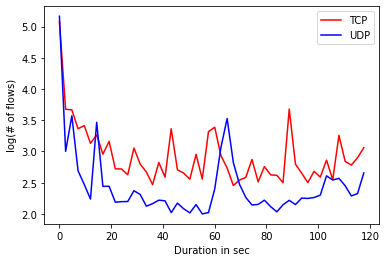

In [ ]:
# Flow duration plots
colors_t_u = ['r', 'b']
for i in range(len(colors_t_u)):
  h = np.histogram(DF_flows[i].flow_duration, bins = 50)
  plt.plot(h[1][:-1], np.log10(h[0]), colors_t_u[i], label=t_u[i])
  plt.legend(loc="upper right")
  plt.xlabel('Duration in sec')
  plt.ylabel('log(# of flows)')
plt.show()


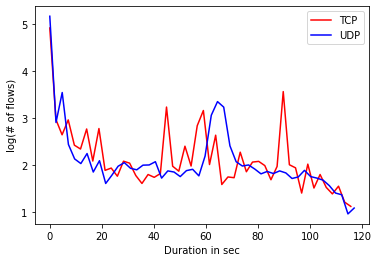

In [ ]:
# as we can see there are a lot of flows with less than 10 packets that last for a lot

colors_t_u = ['r', 'b']
for i in range(len(colors_t_u)):
  h = np.histogram(DF_flows[i][DF_flows[i].num_pk < 10].flow_duration, bins = 50)
  plt.plot(h[1][:-1], np.log10(h[0]), colors_t_u[i], label=t_u[i])
  plt.legend(loc="upper right")
  plt.xlabel('Duration in sec')
  plt.ylabel('log(# of flows)')
plt.show()

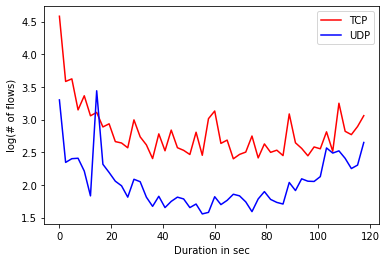

In [ ]:
# So let's consider only those flows with more than 10 packets

colors_t_u = ['r', 'b']
for i in range(len(colors_t_u)):
  h = np.histogram(DF_flows[i][DF_flows[i].num_pk >= 10].flow_duration, bins = 50)
  plt.plot(h[1][:-1], np.log10(h[0]), colors_t_u[i], label=t_u[i])
  plt.legend(loc="upper right")
  plt.xlabel('Duration in sec')
  plt.ylabel('log(# of flows)')
plt.show()

# as we can see there are a lot of peaks at some specific duration (e.g. 15s, 30s, 40s, 60s, 80s)

### Flow size


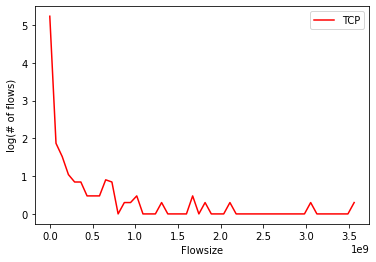

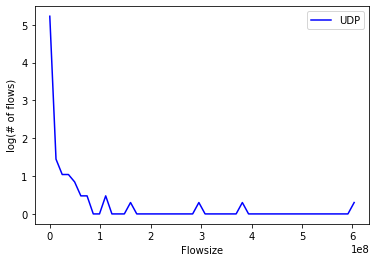

In [ ]:
# Flow size plots
colors_t_u = ['r', 'b']
for i in range(len(colors_t_u)):
  h = np.histogram(DF_flows[i].flow_size, bins = 50)
  plt.plot((h[1][:-1]+1), np.log10(h[0]+1), colors_t_u[i], label=t_u[i])
  plt.legend(loc="upper right")
  plt.xlabel('Flowsize')
  plt.ylabel('log(# of flows)')
  plt.show()



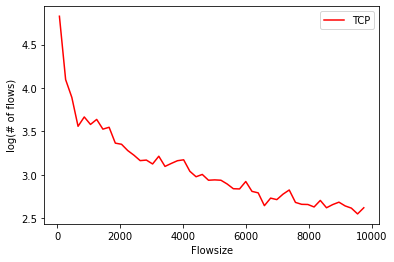

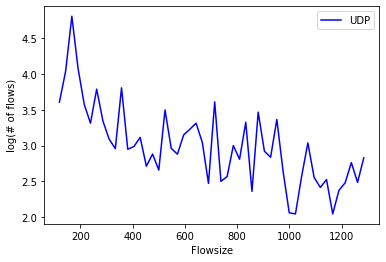

In [ ]:
# There are some outliers, so let's remove it

colors_t_u = ['r', 'b']
for i in range(len(colors_t_u)):
  h = np.histogram(DF_flows[i][DF_flows[i].flow_size < Find_out(DF_flows[i].flow_size)].flow_size, bins = 50)
  plt.plot(h[1][:-1], np.log10(h[0]+1), colors_t_u[i], label=t_u[i])
  plt.legend(loc="upper right")
  plt.xlabel('Flowsize')
  plt.ylabel('log(# of flows)')
  plt.show()

# As we can see this is a good decreasing distrifution

### Number of packets per flow

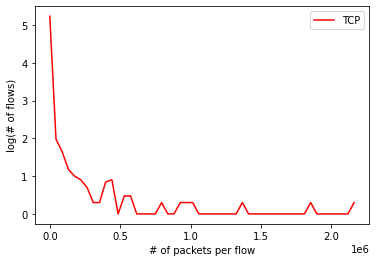

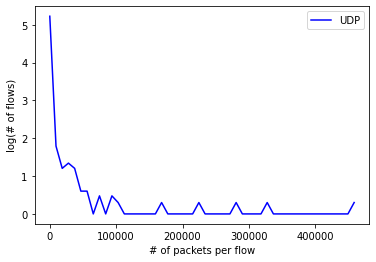

In [ ]:
# Packet per flow plots
colors_t_u = ['r', 'b']
for i in range(len(colors_t_u)):
  h = np.histogram(DF_flows[i].num_pk, bins = 50)
  plt.plot((h[1][:-1]+1), np.log10(h[0]+1), colors_t_u[i], label=t_u[i])
  plt.legend(loc="upper right")
  plt.xlabel('# of packets per flow')
  plt.ylabel('log(# of flows)')
  plt.show()

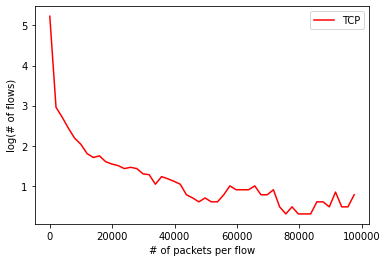

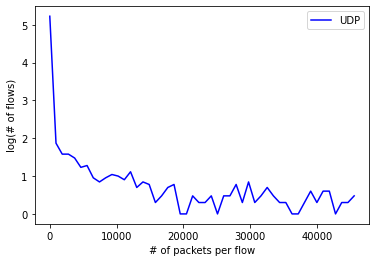

In [ ]:
# the same af for the size, so let's remove the outliers
# This time the upper bound are too small (52 for TCP and 2 for UDP)
# so let's do it manually

colors_t_u = ['r', 'b']
upper_bounds = [10**5, 5*10**4]
for i in range(len(colors_t_u)):
  h = np.histogram(DF_flows[i][DF_flows[i].num_pk < upper_bounds[i]].num_pk, bins = 50)
  plt.plot(h[1][:-1], np.log10(h[0]+1), colors_t_u[i], label=t_u[i])
  plt.legend(loc="upper right")
  plt.xlabel('# of packets per flow')
  plt.ylabel('log(# of flows)')
  plt.show()


## Analyze ratio among flow size and flow duration (bps)


In [5]:
# A function to standardize data
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [70]:
train = DF_flows.copy()
for i in range(2):
  train[i]['flow_duration'] = NormalizeData(train[i]['flow_duration'])
  train[i]['flow_size'] = NormalizeData(train[i]['flow_size'])

In [71]:
# removing all the rows with flow_duration = 0
for i in range(2):
  train[i] = train[i][train[i]['flow_duration'] != 0]
  

In [72]:
# Let's define the ratio
for i in range(2):
  train[i]['ratio'] = train[i]['flow_size']/train[i]['flow_duration']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
# let's see some stat on <ratio>
for i in range(2):
  print('Describe of ', t_u[i])
  print(train[i]['ratio'].describe())
  print('\n\n')

Describe of  TCP
count    1.681790e+05
mean     3.736962e-01
std      1.064594e+00
min      2.507046e-08
25%      2.991991e-05
50%      8.730742e-04
75%      9.571372e-01
max      9.749598e+01
Name: ratio, dtype: float64



Describe of  UDP
count    165846.000000
mean         34.062852
std          62.419204
min           0.000000
25%           5.652623
50%          11.695082
75%          20.661312
max         566.821664
Name: ratio, dtype: float64





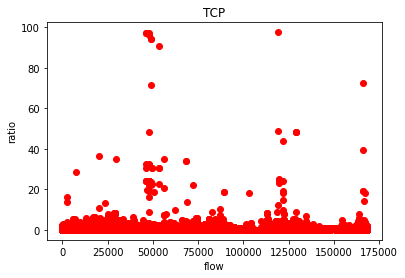

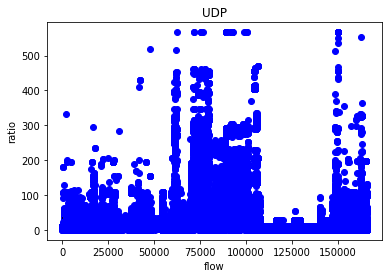

In [74]:
colors_t_u = ['r', 'b']
for i in range(2):
  y = train[i]['ratio']
  x = range(0, len(train[i]['ratio']))
  plt.scatter(x,y, color = colors_t_u[i])
  plt.hlines(np.mean(train[i]['ratio']),xmin=0,xmax=max(train[i]['ratio']),colors='k')
  plt.title(t_u[i])
  plt.xlabel('flow')
  plt.ylabel('ratio')
  plt.show()

In [75]:
# Let's consider only the outliers
ndata = [0,0]
for i in range(2):
  ndata[i] = train[i][train[i]['ratio']>Find_out(train[i]['ratio'])]
  print('for the ', t_u[i], ' there are ',len(ndata[i]['ratio']), ' outliers')


for the  TCP  there are  975  outliers
for the  UDP  there are  31182  outliers


In [76]:
# let's see the combination of protocols and ip version for the outliers
for i in range(2):
  print(t_u[i], 'ip_ver4', len(ndata[i][ndata[i]['ip_ver']==4]))
  print(t_u[i], 'ip_ver6', len(ndata[i][ndata[i]['ip_ver']==6]))  
  
# We care abuot UDP with IPv4

TCP ip_ver4 965
TCP ip_ver6 10
UDP ip_ver4 31182
UDP ip_ver6 0


Text(0.5, 1.0, 'UDP ipv4')

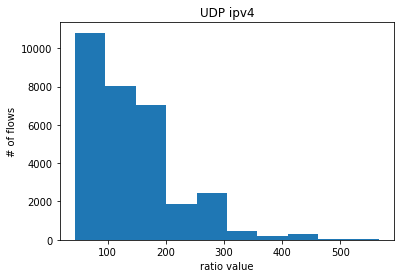

In [77]:
# Save these flows an plot an histogram
udp4 = ndata[1][ndata[1]['ip_ver']==4]
plt.hist(udp4['ratio'])
plt.xlabel('ratio value')
plt.ylabel('# of flows')
plt.title(t_u[i] + ' ipv4')

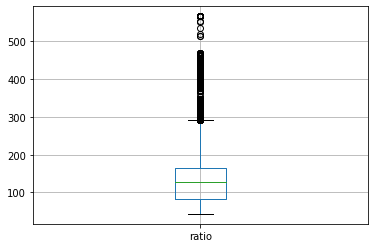

In [78]:
udp4.boxplot(column=['ratio'])

In [79]:
# let's select the outliers 
details = udp4[udp4['ratio']>(np.mean(udp4['ratio'])+2*np.std(udp4['ratio']))]
print(len(details['ratio']))
details.head()

1229


flow_size  ...       ratio
ip.src          ip.dst         ip.proto udp.srcport udp.dstport             ...            
110.82.240.191  163.35.35.179  udp      53          63356         0.000003  ...  331.750506
153.253.2.74    163.35.35.177  udp      53          61578         0.000003  ...  409.717723
156.101.162.230 131.119.89.254 udp      53          52612         0.000004  ...  429.989199
                                                    56927         0.000004  ...  429.989196
                                                    57226         0.000004  ...  429.989196

[5 rows x 5 columns]

In [80]:
# let's analyze the flows identifiers

# save the index in a df
flow_ = list(udp4.index.values)
flow_details = []
for i in flow_:
  ls = list(i)
  flow_details.append([ls[3], ls[4], ls[0], ls[1]])
flow_details = pd.DataFrame(flow_details)
col_names = ['srcport',	'dstport','ip_src', 'ip_dst']
flow_details.columns = col_names
print(flow_details.head())


   srcport  dstport           ip_src          ip_dst
0    14769    33869    101.134.14.67    203.85.97.74
1     8999    33869   101.140.165.57    203.85.97.74
2    49773      161  101.140.227.120  202.23.218.159
3    49774      161  101.140.227.120  202.23.218.159
4    58580      161  101.140.227.120  202.23.218.159


In [81]:
for i in range(4):
  print(col_names[i])
  print(flow_details[col_names[i]].value_counts()[:10], '\n')

srcport
53       28742
6889       228
6881       200
51413      116
27015       55
49160       25
8999        22
49001        8
6880         7
63000        7
Name: srcport, dtype: int64 

dstport
33869    1946
53        185
65166      42
56739      23
161        20
3702       16
29059      15
45771      12
123        11
6881       10
Name: dstport, dtype: int64 

ip_src
203.240.143.134    11228
202.254.15.201      6402
203.240.128.214     5101
202.254.9.49         969
203.85.104.61        597
8.56.11.240          520
203.85.104.45        425
202.24.240.31        248
192.146.42.54        238
131.118.125.237      204
Name: ip_src, dtype: int64 

ip_dst
203.85.97.74      1946
202.98.157.2       884
203.83.231.229     774
101.207.247.66     375
101.207.247.96     373
101.207.247.67     346
202.23.220.110     251
160.48.212.245     217
150.8.254.10       201
150.42.16.243      186
Name: ip_dst, dtype: int64 



### IP sorce

For what concern the ip sorces with an higher count we can see that:
- 203.240.128.0/19 belongs to a telecomunication company (Sejong telecom)
- 202.254.0.0/19 belong to Hyogo University of Teacher Education
- 203.85.102.0/23 belong to a telecomunication company (CITIC telecomunication)

So as we can see the highes number of flows with a huge level of bit per sec comes from telecomunication company or from research department.

# Part 2)

## Windows size analysis

Let's analyze the distribution of the window size of the TCP protocol.

In [ ]:
# for each flow let's consider some statistics for the window size
df = DF[0].groupby(['ip.src', 'ip.dst', 'ip.proto', 'tcp.srcport',	'tcp.dstport']).agg({'tcp.window_size':['count','min', 'max', 'median']})
df.columns = df.columns.droplevel()
df.columns = ['ws_count', 'ws_min', 'ws_max', 'ws_median'] 
df.head()

ws_count  ...  ws_median
ip.src        ip.dst        ip.proto tcp.srcport tcp.dstport            ...           
1.114.234.173 202.23.221.83 tcp      63192       26                  2  ...    59082.0
              202.23.222.39 tcp      63192       23                  2  ...    59082.0
1.114.236.173 202.23.222.27 tcp      16143       23                  4  ...     7979.0
1.125.100.28  202.23.220.95 tcp      32179       23                  2  ...    21918.0
1.134.26.1    202.23.223.45 tcp      443         60348              16  ...       70.0

[5 rows x 4 columns]

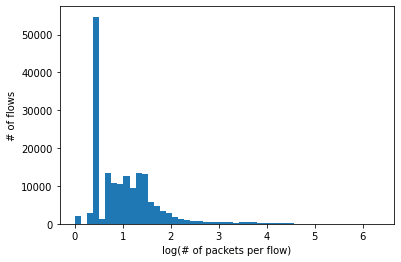

In [ ]:
# plot distr COUNT
plt.hist(np.log10(df['ws_count']+1), bins = 50)
plt.xlabel('log(# of packets per flow)')
plt.ylabel('# of flows')
plt.show()

In [ ]:
# Let's take only the outliers w.r.t the number of packets in a given flow

df_count_out = df[df['ws_count']>Find_out(df['ws_count'])]
print('We are moving from %g rows to %g rows' %(df.shape[0],df_count_out.shape[0]))
df_count_out.head()

We are moving from 171824 rows to 18239 rows


ws_count  ...  ws_median
ip.src        ip.dst         ip.proto tcp.srcport tcp.dstport            ...           
1.196.106.68  163.35.20.53   tcp      21551       443              2873  ...  2087936.0
1.205.160.123 202.23.220.252 tcp      13720       443                88  ...   179712.0
                                      13726       443               131  ...   228352.0
                                      13730       443                56  ...   164864.0
                                      13743       443                54  ...   164864.0

[5 rows x 4 columns]

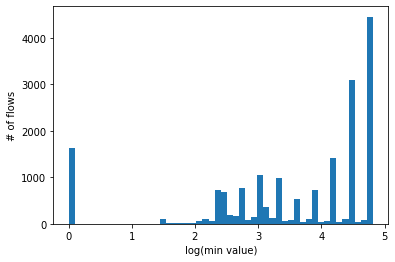

In [ ]:
# plot histograms of min

plt.hist(np.log10(df_count_out['ws_min']+1), bins = 50)
plt.xlabel('log(min value)')
plt.ylabel('# of flows')

plt.show()

In [ ]:
# Pick only the outliers with MIN = 0

df_min = df_count_out[df_count_out['ws_min'] == 0]
print('We are moving from %g rows to %g rows' %(df_count_out.shape[0],df_min.shape[0]))
df_min.head()

We are moving from 18239 rows to 1635 rows


ws_count  ...  ws_median
ip.src       ip.dst        ip.proto tcp.srcport tcp.dstport            ...           
106.112.1.40 150.70.31.141 tcp      50119       80               1376  ...     8212.0
             203.85.105.64 tcp      53355       80                522  ...     1402.0
                                    53396       80                816  ...     1136.0
                                    53468       80               1120  ...     1997.0
                                    53475       80                554  ...     3293.0

[5 rows x 4 columns]

In [ ]:
# pick only the outliers w.r.t. max

df_max = df_min[df_min['ws_max']>Find_out(df_min['ws_max'])]
print('We are moving from %g rows to %g rows' %(df_min.shape[0], df_max.shape[0]))
df_max = df_max.sort_values(by = 'ws_max', ascending = False)
df_max.head()

We are moving from 1635 rows to 218 rows


ws_count  ...   ws_median
ip.src         ip.dst          ip.proto tcp.srcport tcp.dstport            ...            
157.210.110.83 210.147.53.151  tcp      54344       80                 96  ...  16776960.0
210.162.147.35 133.54.30.245   tcp      57837       443               419  ...     65535.0
150.70.216.102 103.139.117.234 tcp      56149       443                62  ...  16776960.0
                                        56150       443               118  ...  16776960.0
                                        56151       443               104  ...  16776960.0

[5 rows x 4 columns]

In [ ]:
# now we only care about those flows with a huge difference among max and median
df_max = df_min[df_min['ws_median']<0.6*df_min['ws_max']]
df_max = df_max.sort_values(by = 'ws_max', ascending = False)
df_max.head(10)

# the first one is the ip 210.162.147.35 belongs to NTT Communications Corporation based in Tokio (Nippon Telegraph and Telephone Corporation)
# Let's select some of the first ip.src with an high max

ws_count  ...  ws_median
ip.src                                 ip.dst                             ip.proto tcp.srcport tcp.dstport            ...           
210.162.147.35                         133.54.30.245                      tcp      57834       443               133  ...    65535.0
                                                                                   57847       443                65  ...    65535.0
                                                                                   57837       443               419  ...    65535.0
                                                                                   57836       443                85  ...    65535.0
150.70.185.197                         23.113.51.228                      tcp      53362       443              3248  ...  6333440.0
203.85.97.39                           117.230.246.25                     tcp      60321       443               894  ...  2116864.0
240b:f853:30a5:9278:32cc:8b96:1b94:e54 2001:1bf0:ea9:90d4:20:1fc:8180:271 tcp      50925       80                385  ...  2134016.0
                                                                                   50926       80                378  ...  2134016.0
                                                                                   50932       80                361  ...  2134016.0
                                                                                   50924       80                335  ...  2128128.0

[10 rows x 4 columns]

### NTT analysis

The first ip_src belong to the NTT company, let's take each packet from this sorce

In [ ]:
# select each packet with an ip.src = '210.162.147.35'
df_ntt = DF[0][DF[0]['ip.src'] == '210.162.147.35']
df_ntt.shape

(4929, 9)

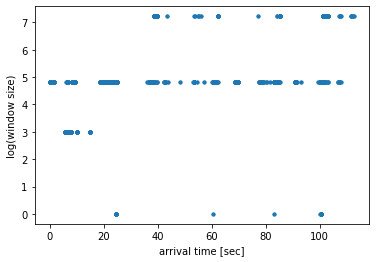

In [ ]:
# plot the window size (log) as function of the arrival time
plt.plot(df_ntt['frame.time_relative'],np.log10(1+df_ntt['tcp.window_size']), linestyle = '', marker = '.')
plt.xlabel('arrival time [sec]')
plt.ylabel('log(window size)')
plt.show()

# As ve can see there are some fixed length of the window size (strange)

### APNIC analysis

Let's now to consider this huge company.
The mask is 203.85.0.0/16, so let's select all the packets with this mask

In [ ]:
# define the mask and select
ip_root = '203.85.'
df_apnic = DF[0][DF[0]['ip.src'].str.startswith(ip_root)]

print('W.r.t. the total number of packets, those with this netmask are ',round(df_apnic.shape[0]/DF[0].shape[0]*100,3), '%')

W.r.t. the total number of packets, those with this netmask are  5.91 %


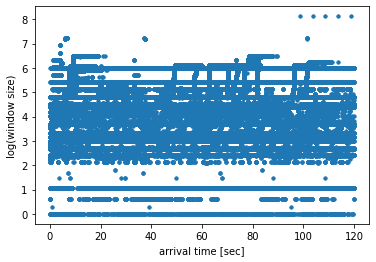

In [ ]:
# plot the window size (log) as function of the arrival time
plt.plot(df_apnic['frame.time_relative'], np.log10(1+df_apnic['tcp.window_size']),linestyle = '', marker = '.')
plt.xlabel('arrival time [sec]')
plt.ylabel('log(window size)')
plt.show()

# We can see that there are some path not constant, we whould select those

#### Look at the single ip





In [ ]:
# Select all the source IP belongs to APNIC
IP_APNIC = df_apnic['ip.src'].value_counts().keys().tolist()
print('there are ', len(IP_APNIC), 'source ip belongs to APNIC')


there are  456 source ip belongs to APNIC


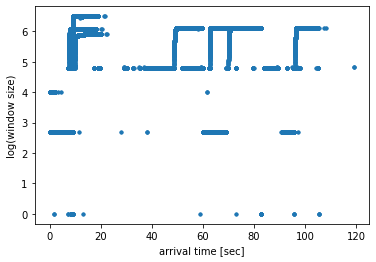

the ip with this path is  203.85.103.74


In [ ]:
# Plot for a fixet ip_src
start = 2
stop = 3
df_a = df_apnic[df_apnic['ip.src'].isin(IP_APNIC[start: stop])]
plt.plot(df_a['frame.time_relative'], np.log10(1+df_a['tcp.window_size']),linestyle = '', marker = '.')
plt.xlabel('arrival time [sec]')
plt.ylabel('log(window size)')
plt.show()

print('the ip with this path is ', IP_APNIC[start])

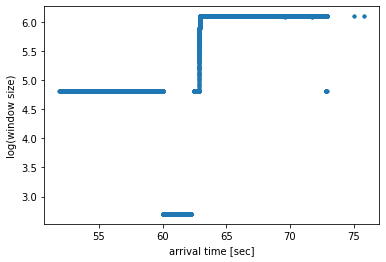

the ip with this path is  58.40.68.93


In [ ]:
# plot for a fixed ip_dst

# destination of the ip_src of before
dst_apnic_a = df_a['ip.dst'].value_counts().keys().tolist()

# as before but for destination
start = 0
stop = 1
df_b = df_a[df_a['ip.dst'].isin(dst_apnic_a[start: stop])]
plt.plot(df_b['frame.time_relative'], np.log10(1+df_b['tcp.window_size']),linestyle = '', marker = '.')
plt.xlabel('arrival time [sec]')
plt.ylabel('log(window size)')
plt.show()

print('the ip with this path is ', dst_apnic_a[start])

## Neither TCP nor UDP analysis

Let's now see the distribution of the protocols of those packets neither TCP nor UDP


In [ ]:
# a list to store the packets
DF_single_type = []

start = time.time()
# choose the number of chunks to analyze
for j in range(4):
  
  # read the .csv
  df_others = pd.read_csv('/content/drive/My Drive/NBDLab/data/split/csv_finali/'+str(j)+'_others.csv')

  # add the right amount of seconds
  df_others['frame.time_relative'] = df_others['frame.time_relative'] + 30*j

  DF_single_type.append(df_others)

print(time.time()-start)
# concatenate all the dataframes
DF_others = pd.concat(DF_single_type)

# free up memory space
DF_single_type = []
print(time.time()-start)

1.0988898277282715
1.1484825611114502


In [ ]:
# let's count the type of protocols

df_others['_ws.col.Protocol'].value_counts()

ICMP       277422
ESP          5457
IPv4         4036
ARP          3280
ICMPv6       1189
ETHERIP       576
IPv6           38
PIM             4
Name: _ws.col.Protocol, dtype: int64

#### What the APNIC do the most with this type of protocols?

In [ ]:
# there are some nan in ip_src, so lets drop those rows
print(' befor drop')
print(df_others.isna().sum())

df_others_n = df_others.dropna()
print('\n\n after drop')
print(df_others_n.isna().sum())

 befor drop
frame.time_relative       0
_ws.col.Protocol          0
ip.src                 7518
ip.dst                 7518
frame.len                 0
dtype: int64


 after drop
frame.time_relative    0
_ws.col.Protocol       0
ip.src                 0
ip.dst                 0
frame.len              0
dtype: int64


In [ ]:
# define the mask and select
ip_root = '203.85.'
df_apnic_others = df_others_n[df_others_n['ip.src'].str.startswith(ip_root)]
df_apnic_count_others = df_apnic_others['_ws.col.Protocol'].value_counts()
print(df_apnic_count_others, '\n\n')

# this are a lot of packets... ICMC o
print(round(df_apnic_count_others[0]/df_others['_ws.col.Protocol'].value_counts()[0]*100, 3), '% of the ICMP come from APNIC') 

ICMP      254362
IPv4         110
ICMPv6         2
PIM            2
Name: _ws.col.Protocol, dtype: int64 


91.688 % of the ICMP come from APNIC


In [ ]:
# how many packet comes from APNIC in others:
print(round(df_apnic_others.shape[0]/df_others.shape[0]*100, 3), '% of the packets come from APNIC') 

87.149 % of the packets come from APNIC


As we can see a huge part of this packets belong to APNIC 